In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

df = pd.read_csv('Mall_Customers.csv')  
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
X = df.drop(['CustomerID','Gender'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Training and Elbow Method

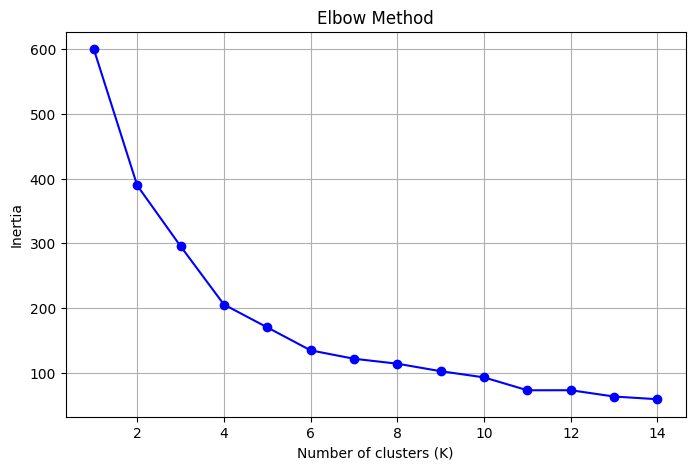

In [21]:
kmeans = KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

inertia = []
K_range = range(1, 15)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


### We can see that the line becomes linear at k=4 and 6 but it sharply bends at 4 so it might be the best k value. But the Silouette Score for 6 is higher than 4 so if you want the cluters to be simple, then use 4 or you want more complex subgroups, then use 6.

# Visualizing the Clusters for k=6

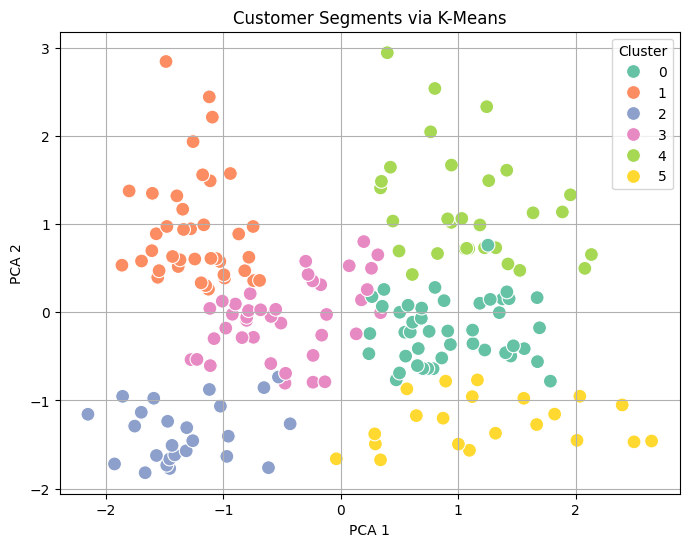

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette='Set2', s=100)
plt.title('Customer Segments via K-Means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Silouette Score

In [23]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(X_scaled)
y_kmeans=km.predict(X_scaled)
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for k=4: {score:.4f}")


km = KMeans(n_clusters=6, random_state=42)
km.fit(X_scaled)
y_kmeans=km.predict(X_scaled)
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for k=6: {score:.4f}")

Silhouette Score for k=4: 0.4040
Silhouette Score for k=6: 0.4311
